# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

### Step 1: Reading and Understanding the Data

In [102]:
#supress warnings

import warnings
warnings.filterwarnings("ignore")

In [103]:
# importing libraries 

import numpy as np
import pandas as pd

In [104]:
# getting the data

housing_data = pd.read_csv("Housing.csv.csv")

In [105]:
# reading the data

housing_data.head(10)

price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5              no             yes        2      yes   semi-furnished  
6              no             yes        2      yes   semi-furnished  
7              no              no        0       no      unfurnished  
8              no             yes        2      yes        furnished  
9              no             yes        1      yes      unfurnished

In [106]:
housing_data.tail(20)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
525  2345000  3640         2          1        1      yes        no       no   
526  2310000  3180         2          1        1      yes        no       no   
527  2275000  1836         2          1        1       no        no      yes   
528  2275000  3970         1          1        1       no        no       no   
529  2275000  3970         3          1        2      yes        no      yes   
530  2240000  1950         3          1        1       no        no       no   
531  2233000  5300         3          1        1       no        no       no   
532  2135000  3000         2          1        1       no        no       no   
533  2100000  2400         3          1        2      yes        no       no   
534  2100000  3000         4          1        2      yes        no       no   
535  2100000  3360         2          1        1      yes        no       no   
536  1960000  3420         5          1        2       no        no       no   
537  1890000  1700         3          1        2      yes        no       no   
538  1890000  3649         2          1        1      yes        no       no   
539  1855000  2990         2          1        1       no        no       no   
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
525              no              no        0       no      unfurnished  
526              no              no        0       no      unfurnished  
527              no              no        0       no   semi-furnished  
528              no              no        0       no      unfurnished  
529              no              no        0       no      unfurnished  
530             yes              no        0       no      unfurnished  
531              no             yes        0      yes      unfurnished  
532              no              no        0       no      unfurnished  
533              no              no        0       no      unfurnished  
534              no              no        0       no      unfurnished  
535              no              no        1       no      unfurnished  
536              no              no        0       no      unfurnished  
537              no              no        0       no      unfurnished  
538              no              no        0       no      unfurnished  
539              no              no        1       no      unfurnished  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished

In [107]:
housing_data.shape

(545, 13)

#### Observation: As of now, The dataset has 545 rows and 13 colums

In [108]:
# Checking the data types

housing_data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [109]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [110]:
housing_data.describe()

price      area  bedrooms  bathrooms  stories  parking
count        545.00    545.00    545.00     545.00   545.00   545.00
mean   4,766,729.25  5,150.54      2.97       1.29     1.81     0.69
std    1,870,439.62  2,170.14      0.74       0.50     0.87     0.86
min    1,750,000.00  1,650.00      1.00       1.00     1.00     0.00
25%    3,430,000.00  3,600.00      2.00       1.00     1.00     0.00
50%    4,340,000.00  4,600.00      3.00       1.00     2.00     0.00
75%    5,740,000.00  6,360.00      3.00       2.00     2.00     1.00
max   13,300,000.00 16,200.00      6.00       4.00     4.00     3.00

In [111]:
# Standadizing the data format

pd.options.display.float_format = '{:,.2f}'.format

In [112]:
housing_data.describe()

price      area  bedrooms  bathrooms  stories  parking
count        545.00    545.00    545.00     545.00   545.00   545.00
mean   4,766,729.25  5,150.54      2.97       1.29     1.81     0.69
std    1,870,439.62  2,170.14      0.74       0.50     0.87     0.86
min    1,750,000.00  1,650.00      1.00       1.00     1.00     0.00
25%    3,430,000.00  3,600.00      2.00       1.00     1.00     0.00
50%    4,340,000.00  4,600.00      3.00       1.00     2.00     0.00
75%    5,740,000.00  6,360.00      3.00       2.00     2.00     1.00
max   13,300,000.00 16,200.00      6.00       4.00     4.00     3.00

In [113]:
missing_values = round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)
missing_values

price              0.00
area               0.00
bedrooms           0.00
bathrooms          0.00
stories            0.00
mainroad           0.00
guestroom          0.00
basement           0.00
hotwaterheating    0.00
airconditioning    0.00
parking            0.00
prefarea           0.00
furnishingstatus   0.00
dtype: float64

In [114]:
mv = housing_data.isnull().sum()
mv.values.tolist()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#### Observation: As there is no null data we can proceed to Data Visualization to get the clear understanding of the data

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [115]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

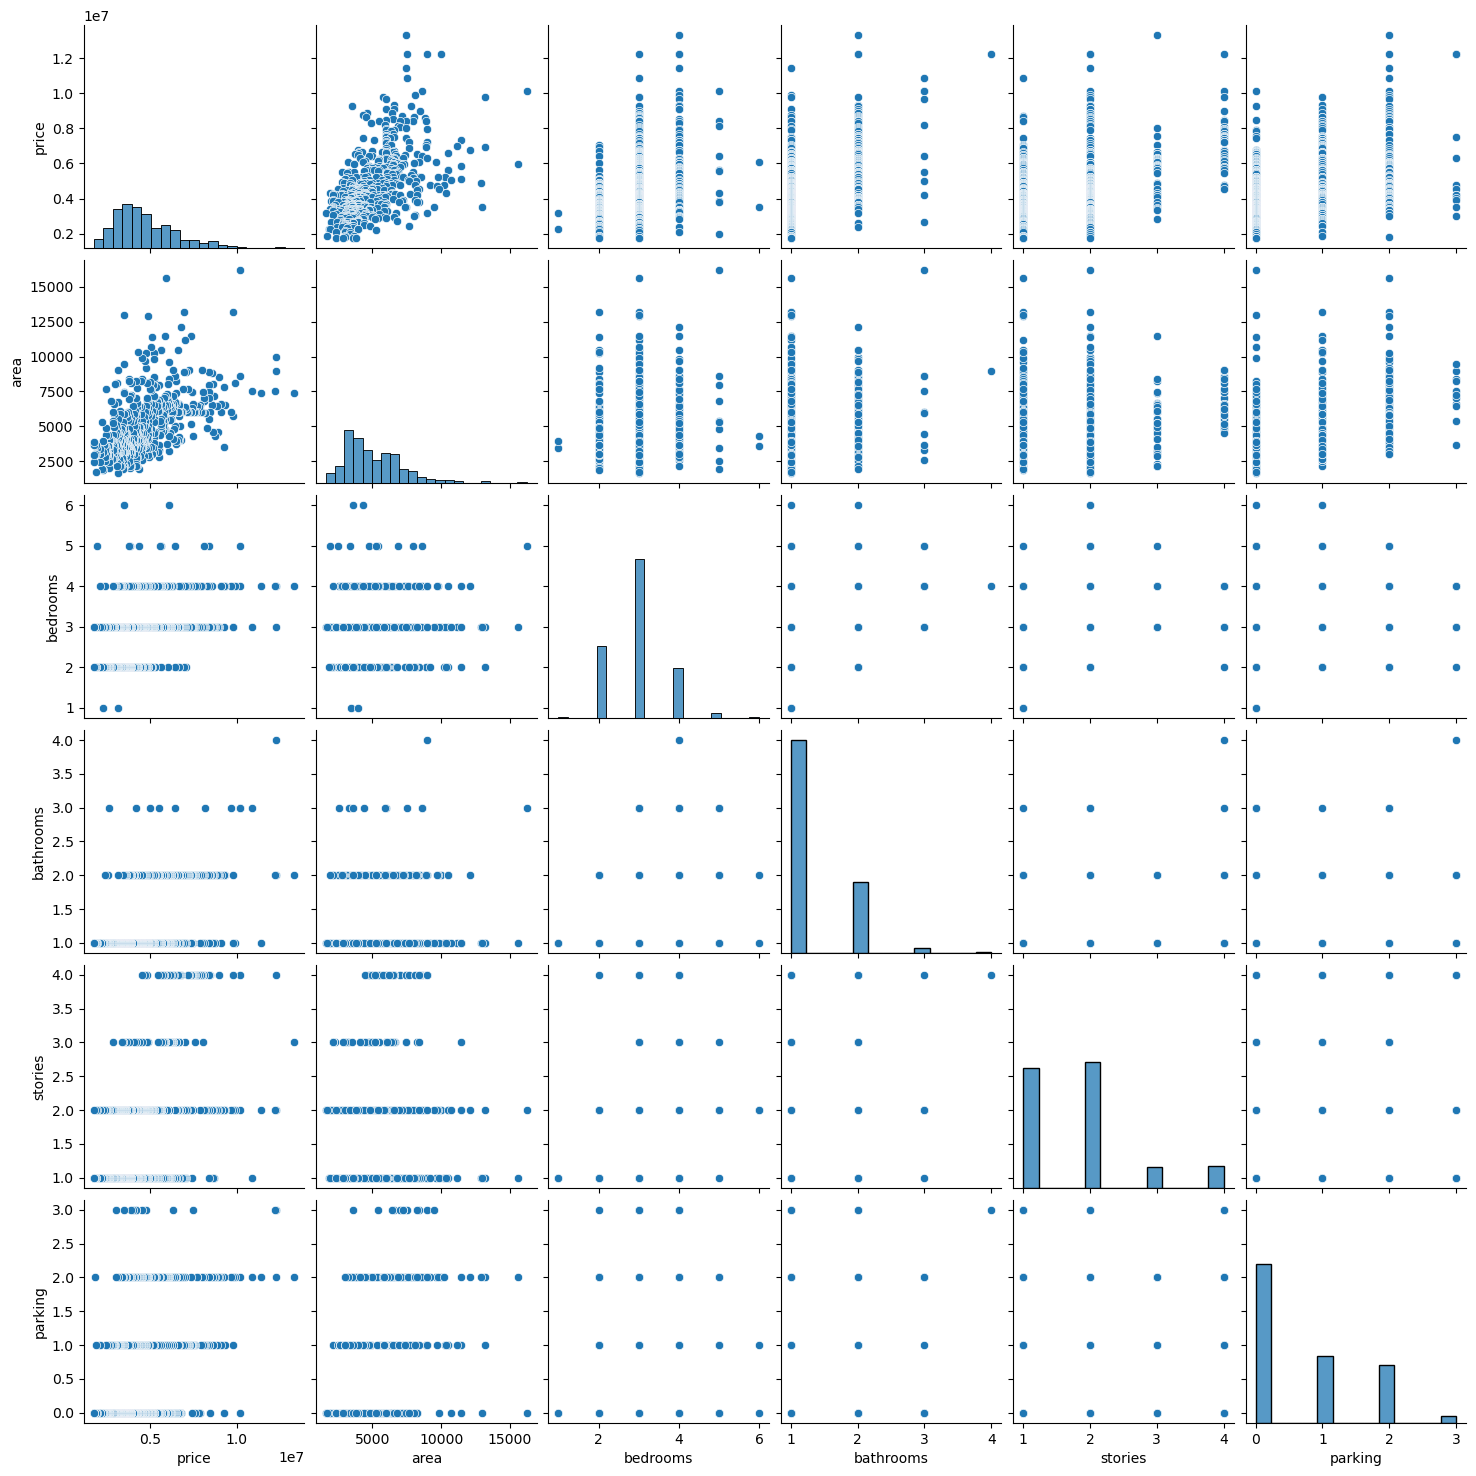

In [116]:
sns.pairplot(housing_data)
plt.show

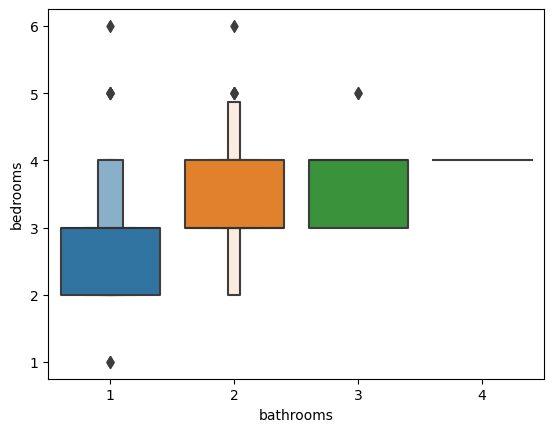

In [117]:
sns.boxenplot(x = "bathrooms", y = 'bedrooms', data = housing_data)
plt.show()

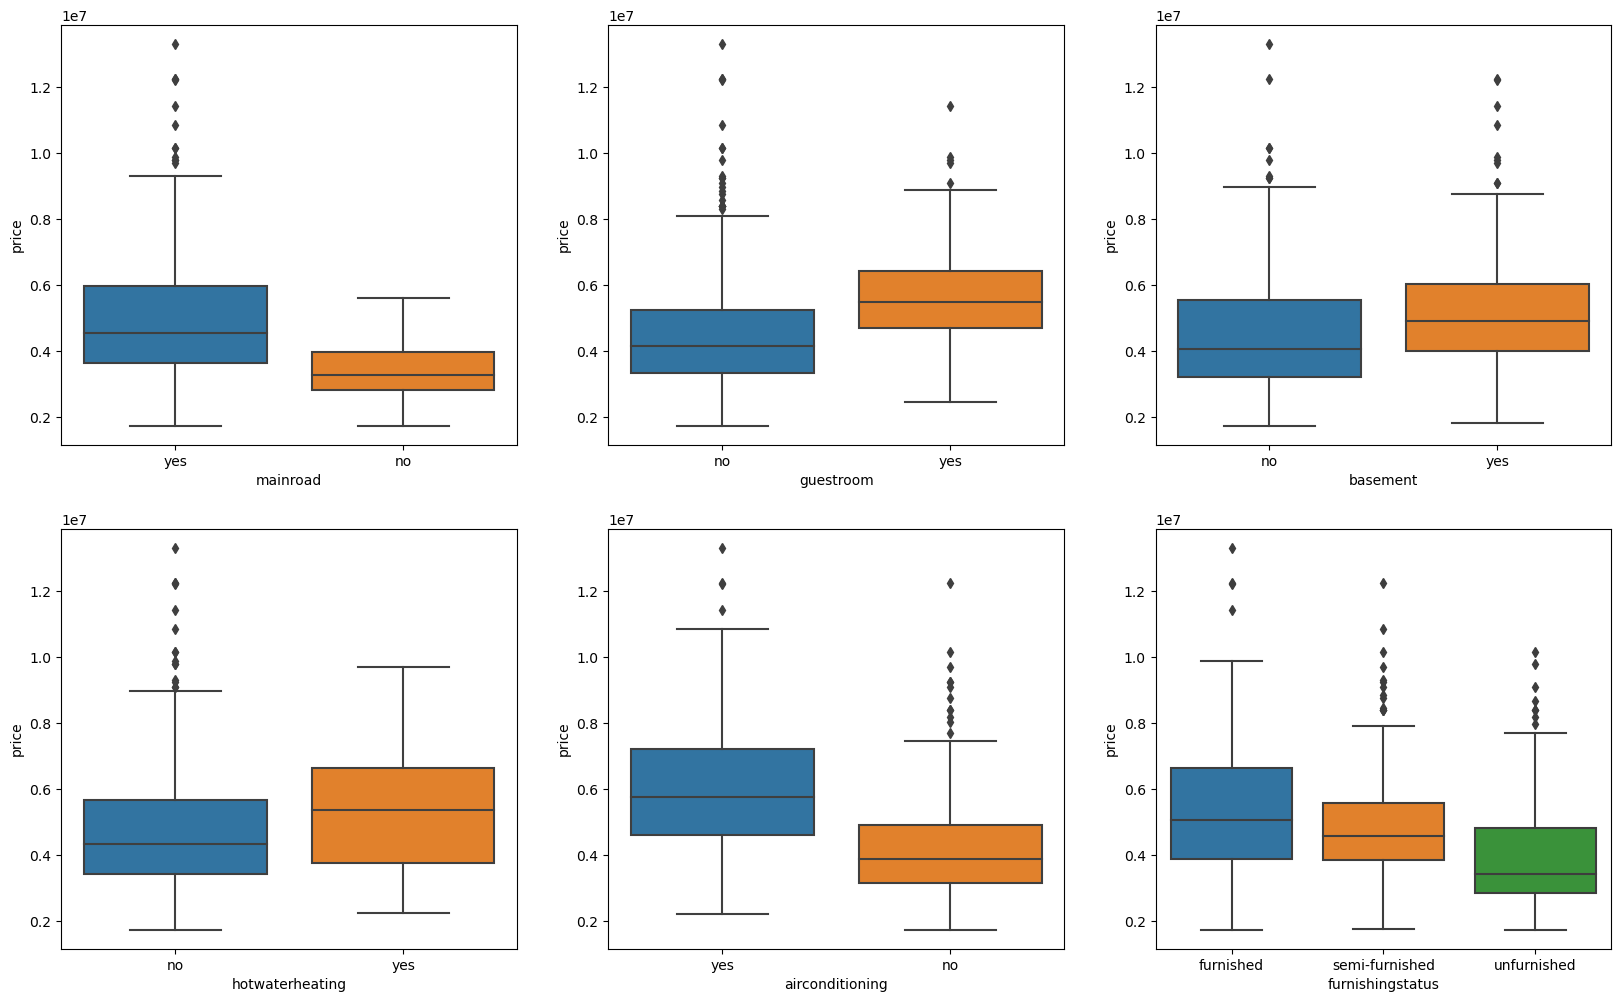

In [118]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing_data)
plt.show()

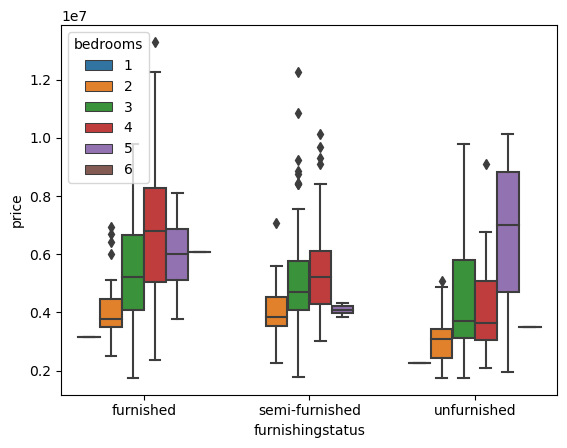

In [119]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'bedrooms' ,data = housing_data)
plt.show()

In [120]:
housing_data.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [121]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [122]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing_data[varlist] = housing_data[varlist].apply(binary_map)

In [123]:
housing_data.head(10)

price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000   7420         4          2        3         1          0   
1  12250000   8960         4          4        4         1          0   
2  12250000   9960         3          2        2         1          0   
3  12215000   7500         4          2        2         1          0   
4  11410000   7420         4          1        2         1          1   
5  10850000   7500         3          3        1         1          0   
6  10150000   8580         4          3        4         1          0   
7  10150000  16200         5          3        2         1          0   
8   9870000   8100         4          1        2         1          1   
9   9800000   5750         3          2        4         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   
5         1                0                1        2         1   
6         0                0                1        2         1   
7         0                0                0        0         0   
8         1                0                1        2         1   
9         0                0                1        1         1   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished  
5   semi-furnished  
6   semi-furnished  
7      unfurnished  
8        furnished  
9      unfurnished

### Dummy Variables

In [124]:
status_of_furnishing = pd.get_dummies(housing_data['furnishingstatus'])

In [125]:
status_of_furnishing.head(10)

furnished  semi-furnished  unfurnished
0          1               0            0
1          1               0            0
2          0               1            0
3          1               0            0
4          1               0            0
5          0               1            0
6          0               1            0
7          0               0            1
8          1               0            0
9          0               0            1

Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [126]:
# Let's drop the first column from status df using 'drop_first = True'

status_of_furnishing = pd.get_dummies(housing_data['furnishingstatus'], drop_first= True)

In [127]:
# Add the results to the original housing dataframe

housing_data = pd.concat([housing_data, status_of_furnishing], axis =1)

In [128]:
housing_data.head(10)

price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000   7420         4          2        3         1          0   
1  12250000   8960         4          4        4         1          0   
2  12250000   9960         3          2        2         1          0   
3  12215000   7500         4          2        2         1          0   
4  11410000   7420         4          1        2         1          1   
5  10850000   7500         3          3        1         1          0   
6  10150000   8580         4          3        4         1          0   
7  10150000  16200         5          3        2         1          0   
8   9870000   8100         4          1        2         1          1   
9   9800000   5750         3          2        4         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   
5         1                0                1        2         1   
6         0                0                1        2         1   
7         0                0                0        0         0   
8         1                0                1        2         1   
9         0                0                1        1         1   

  furnishingstatus  semi-furnished  unfurnished  
0        furnished               0            0  
1        furnished               0            0  
2   semi-furnished               1            0  
3        furnished               0            0  
4        furnished               0            0  
5   semi-furnished               1            0  
6   semi-furnished               1            0  
7      unfurnished               0            1  
8        furnished               0            0  
9      unfurnished               0            1

In [129]:
housing_data.drop(['furnishingstatus'], axis =1, inplace=True)

In [130]:
housing_data.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   semi-furnished  unfurnished  
0               0            0  
1               0            0  
2               1            0  
3               0            0  
4               0            0